# 1. Tujuan dan Batasan Masalah

Tujuan : Predicting the future value of target "Quality"

Batasan masalah : menggunakan XGBClassifier sebagai landasan untuk membuat model dan mengobservasi seberapa robust model pada saat perform, yang diuji melakukan accuracy score, etc.

Kriteria keberhasilan : Using the xgb model i've got the accuracy as 85% on test set. Then i use cross validation to check it again if the score is over so i can conclude that the model is not underfitting or overfitting.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2. Pengetahuan Data

In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/dsc-2024-temporary/train.csv')
train_df

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0 -0.155024 -1.901167   2.615144     1.091245   1.642629  0.378677   
1        1 -2.730624 -1.808060  -4.085386     0.172564  -1.579260  3.380989   
2        2 -0.599057  2.046434  -2.877662     0.505389   0.228996  1.890559   
3        3 -2.010945 -1.426566  -2.334610     1.302376   0.142687  3.922959   
4        4 -1.977980 -0.229483   1.283458     0.238898   1.049935  0.682324   
...    ...       ...       ...        ...          ...        ...       ...   
2795  2795 -0.519382 -2.409052  -1.399648     1.389052   2.121269 -1.978344   
2796  2796 -4.795199 -4.052085   0.969536     3.125764  -0.240487  3.470479   
2797  2797 -0.386819  0.957507  -0.315931     3.380672  -1.908308 -2.620454   
2798  2798 -0.091728  0.185842  -0.826041     1.369838  -0.206288 -1.378037   
2799  2799  2.913270 -1.324942  -3.906278     1.140894  -0.021364  2.057460   

       Acidity Quality  
0    -1.705312    good  
1    -3.847081     bad  
2     2.211756     bad  
3     0.017695     bad  
4     0.369580    good  
...        ...     ...  
2795 -0.083375    good  
2796  6.138965     bad  
2797  0.022230    good  
2798  1.599195    good  
2799  1.193891    good  

[2800 rows x 9 columns]

#3. Data Preprocessing

Variable types and number of observations on train dataframe


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         2800 non-null   int64  
 1   Size         2800 non-null   float64
 2   Weight       2800 non-null   float64
 3   Sweetness    2800 non-null   float64
 4   Crunchiness  2800 non-null   float64
 5   Juiciness    2800 non-null   float64
 6   Ripeness     2800 non-null   float64
 7   Acidity      2800 non-null   float64
 8   Quality      2800 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 197.0+ KB


In [ ]:
train_df.shape

(2800, 9)

In [ ]:
train_df.describe()

A_id         Size       Weight    Sweetness  Crunchiness  \
count  2800.000000  2800.000000  2800.000000  2800.000000  2800.000000   
mean   1399.500000    -0.514743    -0.995706    -0.431350     1.001451   
std     808.434702     1.930621     1.609845     1.970578     1.399908   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     699.750000    -1.850394    -2.020728    -1.741682     0.092788   
50%    1399.500000    -0.514732    -0.988641    -0.498620     1.030332   
75%    2099.250000     0.820971     0.035267     0.846253     1.902271   
max    2799.000000     6.406367     5.790714     6.374916     7.561485   

         Juiciness     Ripeness      Acidity  
count  2800.000000  2800.000000  2800.000000  
mean      0.511097     0.481112     0.108868  
std       1.934171     1.856247     2.093538  
min      -5.961897    -5.864599    -6.739693  
25%      -0.789481    -0.765048    -1.337362  
50%       0.517691     0.491046     0.041436  
75%       1.843950     1.718011     1.562816  
max       7.364403     5.917886     7.404736

Handle Missing Values

In [ ]:
train_df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
train_df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
train_df.duplicated().sum()

0

Data Splitting

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Split X dan y
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#4. Exploratory Data Analysis (EDA)

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=60c906de5285e9a8e0463cc6a457de45d3f7662522b22b5399979a6426e3414e
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(train_df, title="Pandas Profiling Report")
profile.to_notebook_iframe()
profile.to_file("your_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#5. Pembuatan Model


In [ ]:
from xgboost import XGBClassifier

# Encode target variable
label_encoder = LabelEncoder()
train_df["Quality"] = label_encoder.fit_transform(train_df["Quality"])

y = label_encoder.fit_transform(y)
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# Training model
xgb = XGBClassifier(n_estimators=100, random_state=42, max_depth=3, gamma=1, alpha=0.1, reg_lambda=10)
xgb.fit(X_train, y_train)

XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

#6. Evaluasi Model


In [ ]:
# Prediksi pada test set pengujian
y_test_pred = xgb.predict(X_test)

# Hitung metrik evaluasi pada test set
accuracy_test = accuracy_score(y_test, y_test_pred)
accuracy_test

0.8517857142857143

In [ ]:
#Cross-Validation for Robust
scores = cross_val_score(xgb, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

Cross-Validation Scores: [0.85       0.86071429 0.84821429 0.84285714 0.8375    ]
Average Accuracy: 0.847857142857143


#7. Prediksi Kualitas Apel & File Submisi

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/dsc-2024-temporary/test.csv')
test_df

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     2800 -3.715530  0.002642   1.683646     0.094039   3.192435 -1.013796   
1     2801  1.513904 -1.841734  -4.437641     0.018367  -3.893668  3.306741   
2     2802 -2.136026 -0.333469   0.332259     1.535166   1.590917  1.204228   
3     2803  0.146861 -1.283879  -0.136293     0.651486  -0.595226  1.282650   
4     2804  1.391706 -2.046789  -0.451348     2.893526   0.850054  2.250141   
...    ...       ...       ...        ...          ...        ...       ...   
1195  3995 -1.099458 -1.206552   2.136786     1.920249  -1.230805 -2.158367   
1196  3996  0.026381 -0.873745   0.266413    -1.139417  -2.281540  3.338239   
1197  3997 -0.254133 -2.140608  -2.597140     2.037038   0.622878  3.102867   
1198  3998 -2.634621 -0.445615  -0.344895     1.078072   3.364616 -0.408180   
1199  3999 -0.569629 -2.391954  -1.139627     2.661769   3.452586 -2.791589   

       Acidity  
0     4.436088  
1    -1.667204  
2     3.031798  
3    -0.508210  
4    -0.264234  
...        ...  
1195 -0.900826  
1196 -0.417714  
1197  0.598524  
1198 -3.376490  
1199  2.097802  

[1200 rows x 8 columns]

In [ ]:
# Predicting the quality of test set
prediction = xgb.predict(test_df)

prediction = label_encoder.inverse_transform(prediction)

submission = pd.DataFrame(data={"A_id": test_df["A_id"], "Quality": prediction})
submission['Quality'] = submission['Quality'].replace({0: 'bad', 1: 'good'})
submission.to_csv("submission.csv", index=False)
submission

A_id Quality
0     2800     bad
1     2801     bad
2     2802     bad
3     2803     bad
4     2804    good
...    ...     ...
1195  3995     bad
1196  3996    good
1197  3997     bad
1198  3998    good
1199  3999    good

[1200 rows x 2 columns]

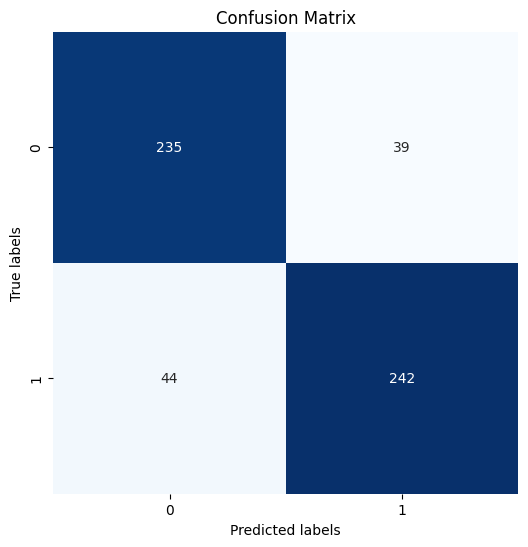

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

#8. Kesimpulan


Kesimpulan : I can conclude that using the xgbclasiffier model improves a little more rather than using logisticRegression. With this model we get the predicted value wich means "Quality" of test set that we needed.


